# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from skopt import BayesSearchCV # Pastikan sudah install: pip install scikit-optimize
from skopt.space import Integer, Categorical, Real
from imblearn.over_sampling import SMOTE

import joblib
from google.colab import files

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [79]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
# Lengkapi kode berikut
# ___ = pd_read_csv("___.csv")
df = pd.read_csv('data_clustering_inverse.csv')

In [80]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSincePrevTransaction,TransactionHour,TransactionDayOfWeek,CustomerAge_encoded,AccountBalance_encoded,Target
0,16.014415,Debit,ATM,70.000008,Doctor,81.0,308.0,5112.209961,3.912088,0.260000,1.0,2,0,0
1,16.391881,Debit,ATM,68.000008,Doctor,141.0,308.0,13758.910156,3.065934,0.260000,1.0,2,3,2
2,16.131360,Debit,Online,19.000002,Student,56.0,308.0,1122.349976,2.923077,1919.109985,0.0,1,2,1
3,16.192032,Debit,Online,26.000003,Student,25.0,308.0,8569.059570,3.648352,0.260000,4.0,1,3,0
4,16.013748,Credit,Online,45.000005,Student,198.0,308.0,7429.399902,1.846154,959.684993,0.0,0,4,0


In [81]:
categorical_features = ['TransactionType', 'Channel', 'CustomerOccupation']
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [82]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.
# Pisahkan fitur (X) dan target (y)
scaler = MinMaxScaler()
# Normalisasi semua kolom numerik, kecuali kolom 'Target'
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop('Target')
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

X = df.drop(columns=['Target'])
y = df['Target']
# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Bentuk data sebelum SMOTE:", y.value_counts())
print("Bentuk data setelah SMOTE:", y_resampled.value_counts())
# Split dulu
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Bentuk data sebelum SMOTE: Target
1    1125
0     955
2     433
Name: count, dtype: int64
Bentuk data setelah SMOTE: Target
0    1125
2    1125
1    1125
Name: count, dtype: int64
Training set shape: X_train=(2700, 13), y_train=(2700,)
Test set shape: X_test=(675, 13), y_test=(675,)


# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

Training Model selesai

==== Decision Tree Classifier ====
Confusion Matrix:
[[235   0   0]
 [  0 228   0]
 [  0   0 212]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       228
           2       1.00      1.00      1.00       212

    accuracy                           1.00       675
   macro avg       1.00      1.00      1.00       675
weighted avg       1.00      1.00      1.00       675

Accuracy: 1.0000

----------------------------------------



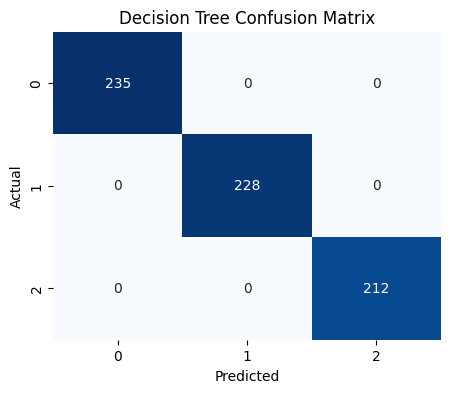

In [83]:
# Buatlah model klasifikasi menggunakan Decision Tree
dt = DecisionTreeClassifier().fit(X_train, y_train)

print('Training Model selesai\n')

y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_dt)

# Use classification_report for multiclass evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Use accuracy_score for overall accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")

print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [84]:
# Menyimpan Model
# import joblib
# joblib.dump(model, 'decision_tree_model.h5')
joblib.dump(dt, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [85]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
lr = LogisticRegression().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


In [86]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
# Fungsi evaluasi multi-clasS
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    results = {
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'Classification Report': classification_report(y_test, y_pred, digits=4)
    }
    return results

# Evaluasi semua model
results = {
    'Logistic Regression (LR)': evaluate_model(lr, X_test, y_test),
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Ringkasan skor
summary_df = pd.DataFrame([
    {
        'Model': name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    }
    for name, metrics in results.items()
])

summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (LR),0.979259,0.979435,0.979259,0.979306
1,K-Nearest Neighbors (KNN),0.862222,0.861721,0.862222,0.859821
2,Decision Tree (DT),1.000000,1.000000,1.000000,1.000000
3,Random Forest (RF),1.000000,1.000000,1.000000,1.000000
4,Support Vector Machine (SVM),0.949630,0.952089,0.949630,0.949558
5,Naive Bayes (NB),0.957037,0.958542,0.957037,0.957069


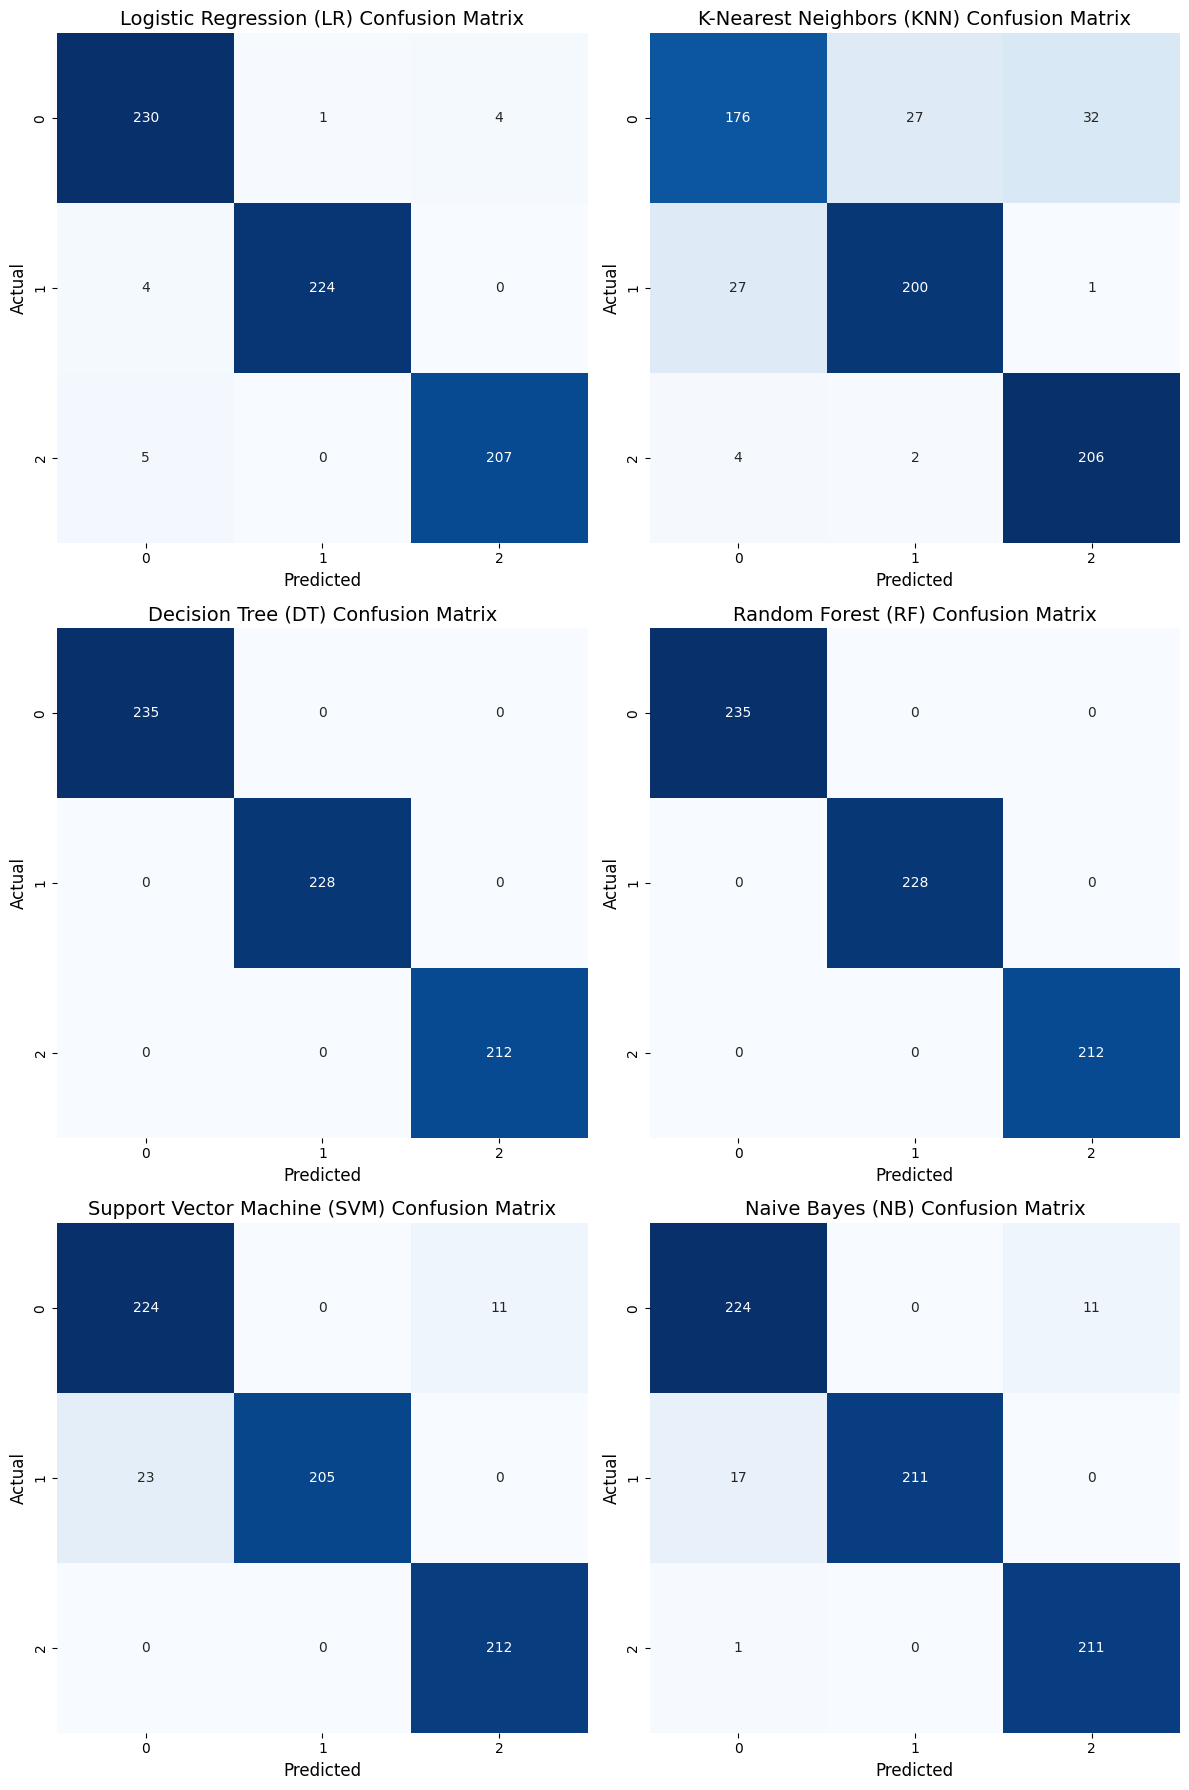

In [87]:
# visualisasi confusion matrix
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
axes = axes.flatten()
for i, (model_name, metrics) in enumerate(results.items()):

    cm = metrics['Confusion Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)
    axes[i].set_title(f'{model_name} Confusion Matrix', fontsize=14)
    axes[i].set_xlabel('Predicted', fontsize=12)
    axes[i].set_ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.show()

In [88]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
# import joblib
# joblib.dump(___, 'explore_<Nama Algoritma>_classification.h5')
# Simpan Logistic Regression
joblib.dump(lr, 'explore_LogisticRegression_classification.h5')

# Simpan Random Forest
joblib.dump(rf, 'explore_RandomForest_classification.h5')

# Simpan SVM
joblib.dump(svm, 'explore_SVM_classification.h5')

# Simpan KNN
joblib.dump(knn, 'explore_KNN_classification.h5')

# Simpan Naive Bayes
joblib.dump(nb, 'explore_NaiveBayes_classification.h5')

['explore_NaiveBayes_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [89]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
# Lakukan dalam satu cell ini saja.
tuning_jobs = [
    {
        'name': 'Logistic Regression',
        'estimator': LogisticRegression(random_state=42, max_iter=300),
        'method': 'grid',  # Kita gunakan Grid Search untuk model ini
        'params': {
            'C': [0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    {
        'name': 'K-Nearest Neighbors',
        'estimator': KNeighborsClassifier(),
        'method': 'grid',  # Grid Search juga cocok untuk KNN
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    {
        'name': 'Random Forest',
        'estimator': RandomForestClassifier(random_state=42),
        'method': 'random', # RF punya banyak parameter, Random Search lebih cepat
        'params': {
            'n_estimators': [100, 200, 300, 400],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2']
        }
    },
    {
        'name': 'Support Vector Machine',
        'estimator': SVC(random_state=42, probability=True),
        'method': 'bayes', # SVM mahal untuk dituning, Bayesian lebih cerdas
        'params': {
            'C': Real(0.1, 100.0, 'log-uniform'),
            'gamma': Real(0.001, 1.0, 'log-uniform'),
            'kernel': Categorical(['rbf', 'linear'])
        }
    },
    {
        'name': 'Naive Bayes',
        'estimator': GaussianNB(),
        'method': 'grid', # Model simpel, Grid Search sudah cukup
        'params': {
            'var_smoothing': np.logspace(0, -9, num=100)
        }
    }
]


for job in tuning_jobs:
    print(f"\n{'='*20} MEMULAI TUNING UNTUK: {job['name'].upper()} {'='*20}")

    tuner = None # Variabel untuk menampung tool tuning

    # Pilih tool tuning berdasarkan 'method'
    if job['method'] == 'grid':
        tuner = GridSearchCV(
            estimator=job['estimator'],
            param_grid=job['params'],
            cv=5, n_jobs=-1, verbose=2, scoring='accuracy'
        )
    elif job['method'] == 'random':
        tuner = RandomizedSearchCV(
            estimator=job['estimator'],
            param_distributions=job['params'],
            n_iter=50, # Coba 50 kombinasi acak
            cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42
        )
    elif job['method'] == 'bayes':
        tuner = BayesSearchCV(
            estimator=job['estimator'],
            search_spaces=job['params'],
            n_iter=32, # Coba 32 kombinasi cerdas
            cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42
        )
    else:
        print(f"Metode tuning '{job['method']}' tidak dikenali. Melewati {job['name']}.")
        continue

    # Jalankan proses fitting
    print(f"Menggunakan metode: {job['method'].capitalize()} Search")
    tuner.fit(X_train, y_train)

    # Ambil model terbaik dan tampilkan hasilnya
    best_model = tuner.best_estimator_
    print(f"\nParameter terbaik untuk {job['name']}: {tuner.best_params_}")

    print(f"\nHasil Evaluasi {job['name']} setelah tuning:")
    tuned_results = evaluate_model(best_model, X_test, y_test)
    print(f"Accuracy: {tuned_results['Accuracy']:.4f}")
    print(f"Precision: {tuned_results['Precision']:.4f}")
    print(f"Recall: {tuned_results['Recall']:.4f}")
    print(f"F1-Score: {tuned_results['F1-Score']:.4f}")
    print("\nClassification Report:")
    print(tuned_results['Classification Report'])


    # Simpan model hasil tuning secara otomatis
    filename = f"tuning_{job['name'].lower().replace(' ', '_')}.h5"
    joblib.dump(best_model, filename)
    print(f"\nModel '{filename}' berhasil disimpan.")
    print(f"{'='*20} SELESAI TUNING UNTUK: {job['name'].upper()} {'='*20}")

print("\n\n>>>> SEMUA PROSES TUNING TELAH SELESAI! <<<<")


==================== MEMULAI TUNING UNTUK: LOGISTIC REGRESSION ====================
Menggunakan metode: Grid Search
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Parameter terbaik untuk Logistic Regression: {'C': 100, 'solver': 'lbfgs'}

Hasil Evaluasi Logistic Regression setelah tuning:
Accuracy: 0.9926
Precision: 0.9926
Recall: 0.9926
F1-Score: 0.9926

Classification Report:
              precision    recall  f1-score   support

           0     0.9957    0.9830    0.9893       235
           1     0.9956    0.9956    0.9956       228
           2     0.9860    1.0000    0.9930       212

    accuracy                         0.9926       675
   macro avg     0.9925    0.9929    0.9926       675
weighted avg     0.9926    0.9926    0.9926       675


Model 'tuning_logistic_regression.h5' berhasil disimpan.
==================== SELESAI TUNING UNTUK: LOGISTIC REGRESSION ====================

==================== MEMULAI TUNING UNTUK: K-NEAREST NEIGHBORS =================

End of Code